In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy
import plotly.graph_objects as go
%matplotlib inline

In [2]:
def log_Loss_Function(Absolute_Errors,sigma_values):
    return (1/2)*np.log(2*np.pi) + np.log(sigma_values) + (1/2) * (Absolute_Errors/sigma_values)**2

In [39]:
true_value = 10
std = 1
interval = 100
mean_values = np.linspace(-100*true_value,100*true_value,interval)
Absolute_Errors = true_value - mean_values
sigma_values = np.linspace(100*std,1000*std,interval)
print(Absolute_Errors[:10],sigma_values[:10])

sigma_value = np.ones(shape = (interval,))
print(sigma_value[:10])

[1010.          989.7979798   969.5959596   949.39393939  929.19191919
  908.98989899  888.78787879  868.58585859  848.38383838  828.18181818] [100.         109.09090909 118.18181818 127.27272727 136.36363636
 145.45454545 154.54545455 163.63636364 172.72727273 181.81818182]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
log_Loss_Function(-21878.73269142+228.1314,np.exp(630.51697))

596.9096760921051

In [41]:
Flatten_condition = true_value + sigma_values*np.sqrt(sigma_values)

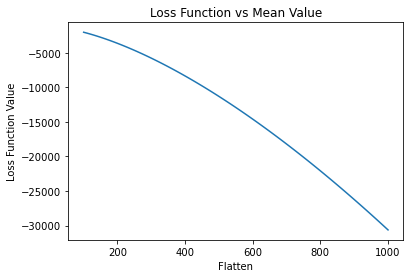

In [42]:
plt.Figure()
plt.plot(sigma_values,mean_values - Flatten_condition)
plt.xlabel("Flatten")
plt.ylabel("Loss Function Value")
plt.title("Loss Function vs Mean Value")
plt.show()

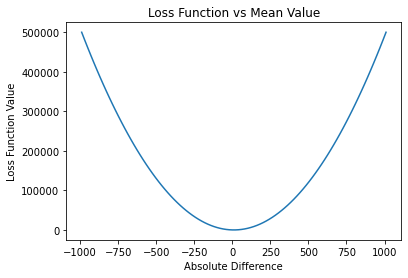

In [43]:
plt.Figure()
plt.plot(Absolute_Errors,log_Loss_Function(mean_values,sigma_value))
plt.xlabel("Absolute Difference")
plt.ylabel("Loss Function Value")
plt.title("Loss Function vs Mean Value")
plt.show()

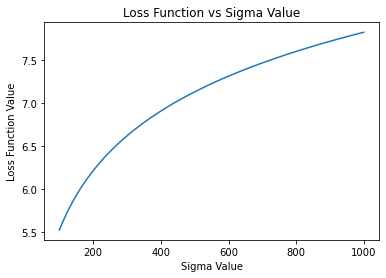

In [44]:
plt.Figure()
plt.plot(sigma_values,log_Loss_Function(true_value,sigma_values))
plt.xlabel("Sigma Value")
plt.ylabel("Loss Function Value")
plt.title("Loss Function vs Sigma Value")
plt.show()

In [45]:
x,y = np.meshgrid(Absolute_Errors,sigma_values)
z = log_Loss_Function(x,y)
print(np.shape(x),np.shape(y),np.shape(z))

(100, 100) (100, 100) (100, 100)


In [46]:
fig = go.Figure(data = [go.Surface(z = z, x = x, y = y)])
fig.update_layout(title = "LogNormal Loss Function", scene = dict(xaxis_title = "Absolute_Errors",yaxis_title = "Uncertainty", zaxis_title = "Loss"), autosize = False,
width = 500, height = 500)
fig.update_traces(contours_z = dict(show = True, usecolormap = True, highlightcolor = "limegreen", project_z = True))
fig.update_scenes(camera_eye_x = 1.5, camera_eye_y = -2.5, camera_eye_z = 0.5)

In [11]:
fig.write_image("LossSurfaceUpdated2.pdf")